 <ipython-input-1-82de50f05261>:9: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
 <ipython-input-1-82de50f05261>:11: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


[[ 1.208985e+00  4.214480e-01]
 [ 5.045420e-01 -2.857300e-01]
 [ 6.305680e-01  1.054712e+00]
 [ 1.056364e+00  6.018730e-01]
 [ 1.095326e+00 -1.447579e+00]
 [-2.101650e-01  2.840000e-04]
 [-3.671510e-01 -1.255189e+00]
 [ 8.680130e-01 -1.063465e+00]
 [ 1.704441e+00 -6.448330e-01]
 [ 5.656190e-01 -1.637858e+00]
 [ 5.983890e-01 -1.477808e+00]
 [ 5.809270e-01 -7.838980e-01]
 [ 1.183283e+00 -1.797936e+00]
 [ 3.318430e-01 -1.869486e+00]
 [-5.119500e-02  9.894750e-01]
 [ 2.427090e+00  1.735570e-01]
 [ 1.603778e+00 -3.069100e-02]
 [ 1.286206e+00 -1.079916e+00]
 [-1.243951e+00  1.005355e+00]
 [ 1.181748e+00  1.523744e+00]
 [ 8.962220e-01  1.899568e+00]
 [-3.662070e-01 -6.649870e-01]
 [-7.880000e-02  1.007368e+00]
 [-1.351435e+00  1.766786e+00]
 [-2.204230e-01 -4.424050e-01]
 [ 8.362530e-01 -1.927526e+00]
 [ 3.989900e-02 -1.435842e+00]
 [ 2.567550e-01  9.467220e-01]
 [ 9.748360e-01 -9.449670e-01]
 [ 7.052560e-01 -2.618644e+00]
 [ 7.381880e-01 -1.666242e+00]
 [ 1.245931e+00 -2.200826e+00]
 [ 2.976

 /home/torainu/anaconda3/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


AttributeError: 'dict' object has no attribute 'plot'

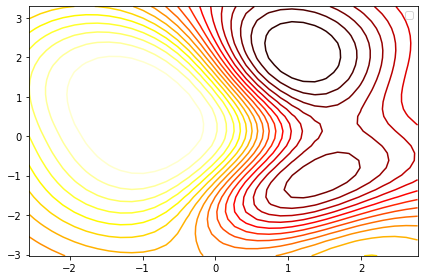

In [1]:
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb
kernel = GPy.kern.RBF(1, ARD=True)

d = pd.read_csv('http://kasugano.sakura.ne.jp/images/2016/20161112/data-classification.txt')
model = GPy.models.GPClassification(d[['X1', 'X2']].values, d.Y[:, None])
print(d[['X1','X2']].values)
print(d.Y[:,None])
model.optimize()

ax = model.plot(plot_data=False)
d0 = d[d.Y == 0]
d1 = d[d.Y == 1]
ax.plot(d0.X1, d0.X2, 'ro')
ax.plot(d1.X1, d1.X2, 'bo')


In [20]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

def create_dataset(
    n_samples=30,
    n_classes=2,
):
    return make_gaussian_quantiles(
        n_samples=n_samples,
        n_features=1,
        n_classes=n_classes,
        random_state=0,
        shuffle=False,
        cov=2,
    )


In [21]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)

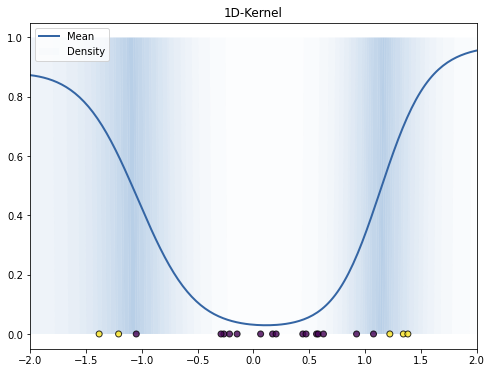

In [25]:
kernel = GPy.kern.RBF(1, ARD=True)

X, y = create_dataset(n_samples=30)

#print(y[:,None])
#print(X[:,0])
model = GPy.models.GPClassification(X,y[:,None])
model.optimize()

fig = pb.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim((-10,10))
ax1.set_title('1D-Kernel')
model.plot(plot_limits=(-2,2),which_data_rows=None,ax=ax1,plot_data=False,plot_density=True,legend=False)
ax1.scatter(X[:, 0], np.zeros(len(X)), alpha=0.8, c=y, edgecolor="k")
ax1.legend()
plt.savefig('1D-kernel.png')